<a href="https://colab.research.google.com/github/codedreamerD/Konversi-Suhu-dari-Fahreinheit-ke-Celsius/blob/main/irisflower_program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Iris dataset
The iris dataset contains the following data

- 50 samples of 3 different species of iris (150 samples total)
- Measurements: sepal length, sepal width, petal length, petal width
- The format for the data: (sepal length, sepal width, petal length, petal width)


### The variables are:

sepal_length: Sepal length, in centimeters, used as input.

1.   sepal_width: Sepal width, in centimeters, used as input.
2.   petal_length: Petal length, in centimeters, used as input.
3.   petal_width: Petal width, in centimeters, used as input.
4.   class: Iris Setosa, Versicolor, or Virginica, used as the target.

### Contents

Data Preprocessing: Include Libraries, Import DataSet, Handle Missing Value

Data Visualization: Scatterplot, Pairplot, Barplot, Violin, Areaplot, Correlation, and Feature Engineering

Machine learning Model: Logistic Regression, Random Forest Classifier, Naive Bayes, KNN, Decision Tree, and Support Vector Machine

# **# 1. Data Preprocessing**

Mengimport:
* numpy: Digunakan untuk operasi numerik.
* pandas: Digunakan untuk memanipulasi dan analisis data.
* seaborn: Untuk visualisasi data tingkat tinggi.[link text](https://)
* matplotlib: Untuk membuat grafik dasar.
* plt.style.use: Mengatur gaya visualisasi menjadi seaborn-dark-palette untuk konsistensi estetika pada grafik.



In [1]:
import numpy as np #linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('seaborn-dark-palette')

<ipython-input-1-38a5f8df3b37>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


# **2. Importing and Displaying Iris Dataset**



*   **pd.read_csv()**: Membaca file CSV berisi data Iris.
*   **head()**: Menampilkan lima baris pertama data untuk melihat struktur awal.



In [2]:
data = pd.read_csv('iris_flower.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# 3. **Exploratory Data Analysis**
## 3.1 Menampilkan Informasi Dataset

**info()**: Memberikan informasi tentang tipe data, jumlah non-null, dan penggunaan memori dari dataset.

In [3]:
# checking the info of data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB



* Memiliki 4 kolom bertipe float dan 1 kolom bertipe kategorikal.
* Kolom ID tidak berguna, jadi mari kita hapus kolom ini.

In [4]:
data = data.drop(['Id'], axis=1)

## **3.2. Mengecek Shape Data**

**shape**: Menunjukkan dimensi dataset, yaitu (150, 5) yang berarti 150 sampel dan 5 kolom.

In [5]:
# checking shape of data
data.shape

(150, 5)

Data ini terdiri dari 150 sampel dan 5 kolom. Kolom-kolom tersebut adalah:

1. **Id**: Identifikasi unik untuk setiap sampel (biasanya tidak digunakan dalam analisis).
2. **Panjang Sepal (SepalLengthCm)**: Panjang dari sepal bunga dalam satuan sentimeter.
3. **Lebar Sepal (SepalWidthCm)**: Lebar dari sepal bunga dalam satuan sentimeter.
4. **Panjang Kelopak (PetalLengthCm)**: Panjang dari kelopak bunga dalam satuan sentimeter.
5. **Lebar Kelopak (PetalWidthCm)**: Lebar dari kelopak bunga dalam satuan sentimeter.
6. **Spesies (Species)**: Kategori atau label dari sampel, yang menunjukkan jenis bunga Iris (Iris-setosa, Iris-versicolor, Iris-virginica).

## **3.3. Mengecek Nilai Kosong**

**isnull().sum()**: Mengecek apakah ada nilai kosong dalam dataset. Output menunjukkan tidak ada nilai kosong.

In [6]:
# checking for all the null values
data.isnull().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


Tidak ada nilai yang hilang dalam data.

## **3.4. Statistik Deskriptif**

**describe()**: Menampilkan statistik deskriptif (mean, std, min, max) untuk setiap kolom numerik.

In [7]:
# summary statistics of quantitative variables
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Untuk melihat distribusi kategori dalam kolom kategorikal (dalam hal ini, kolom Spesies), kita bisa menggunakan beberapa metode, seperti count plot atau fungsi **value_counts()**.

## **3.5. Distribusi Kelas**

Menghitung proporsi setiap jenis spesies dalam dataset. Terdapat tiga jenis spesies yang memiliki distribusi sama (33.33%).

In [8]:
data["Species"].value_counts() / len(data)

,count
Species,
Iris-setosa,0.333333
Iris-versicolor,0.333333
Iris-virginica,0.333333


Dataset ini memiliki tiga jenis tanaman Iris.

Seperti yang dapat kita lihat, distribusi data pada setiap kelas adalah sama, sehingga Iris merupakan dataset yang seimbang karena jumlah data pada setiap kelas adalah 50.

# **4. Bagaimana Data Didistribusikan pada Setiap Fitur**

## **4.1. Membuat Histogram**

Membuat histogram dari masing-masing fitur untuk melihat distribusi nilai pada setiap fitur dataset Iris.

## **4.2  Visualisasi Sepal dan Petal berdasarkan Spesies**

* **stripplot()**: Digunakan untuk menampilkan distribusi nilai fitur PetalLengthCm, PetalWidthCm, SepalLengthCm, dan SepalWidthCm berdasarkan kategori Species.
* **figure()**: Mengatur ukuran grafik agar lebih jelas.

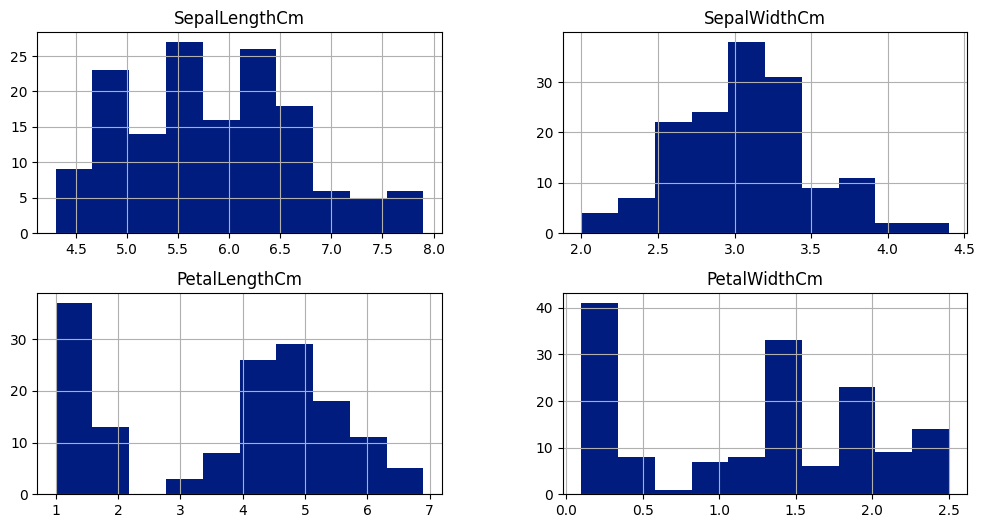

In [9]:
data.hist()
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

Untuk melihat bagaimana data terdistribusi berdasarkan spesies, kita dapat menggunakan beberapa metode visualisasi yang menunjukkan perbedaan antara fitur berdasarkan kelas Spesies.



## **4.3. Visualisasi Distribusi Numerik vs Kategori.**

* **sns.swarmplot(x='Species', y='PetalLengthCm', data=data)**:

  Membuat swarm plot untuk Species pada sumbu x dan PetalLengthCm pada sumbu y. Setiap titik mewakili satu sampel, menunjukkan distribusi panjang petal di setiap spesies.

* **sns.swarmplot(x='Species', y='PetalWidthCm', data=data)**:

  Membuat swarm plot untuk Species (x) dan PetalWidthCm (y), menunjukkan distribusi lebar petal di setiap spesies.

* **sns.swarmplot(x='Species', y='SepalLengthCm', data=data)**:

  Membuat swarm plot untuk Species (x) dan SepalLengthCm (y), menunjukkan distribusi panjang sepal di setiap spesies.

* **sns.swarmplot(x='Species', y='SepalWidthCm', data=data)**:

  Membuat swarm plot untuk Species (x) dan SepalWidthCm (y), menunjukkan distribusi lebar sepal di setiap spesies.



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Species', ylabel='SepalWidthCm'>

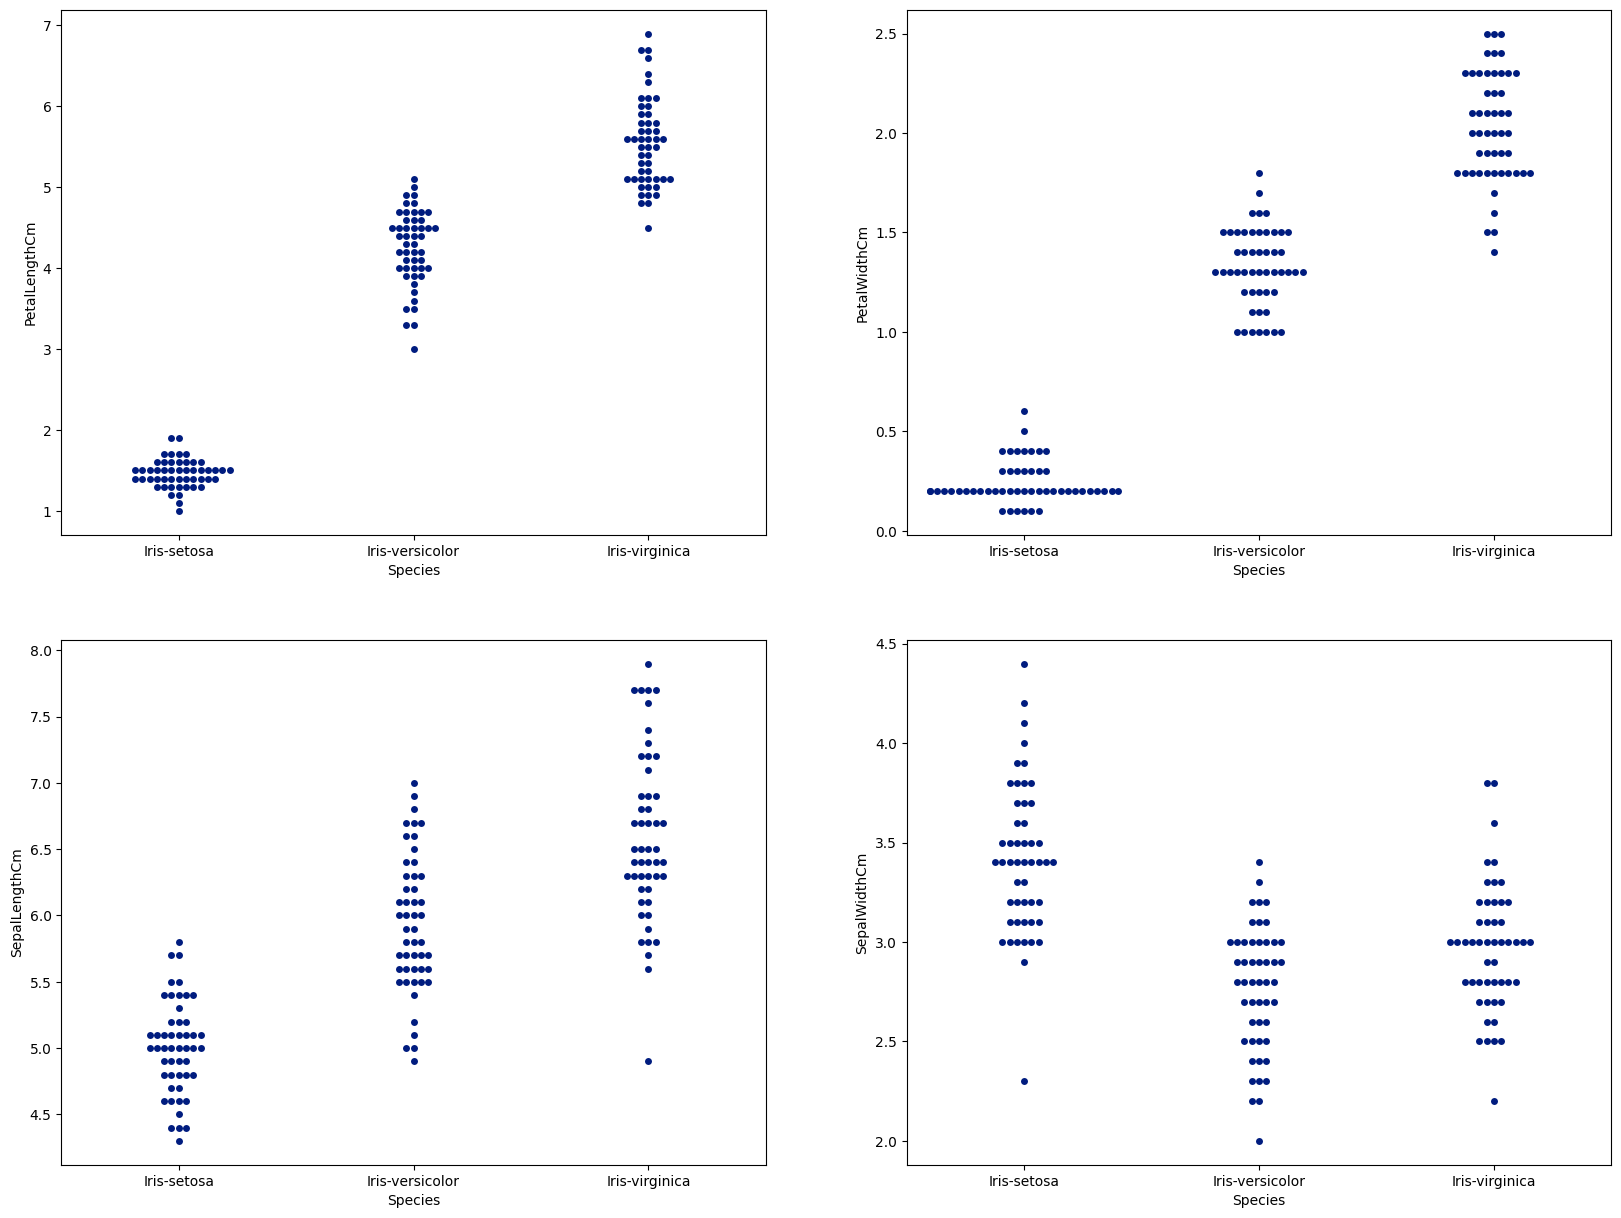

In [10]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.swarmplot(x='Species',y='PetalLengthCm',data=data)
plt.subplot(2,2,2)
sns.swarmplot(x='Species',y='PetalWidthCm',data=data)
plt.subplot(2,2,3)
sns.swarmplot(x='Species',y='SepalLengthCm',data=data)
plt.subplot(2,2,4)
sns.swarmplot(x='Species',y='SepalWidthCm',data=data)

Untuk memplot jumlah setiap spesies dalam dataset, kita bisa menggunakan count plot. Ini akan memberikan visualisasi yang jelas tentang seberapa banyak setiap spesies ada dalam data.

## **4.4. Visualisasi Data dengan Count Plot**

* **plt.figure(figsize=(10,6))**: Membuat dan mengatur ukuran kanvas plot menjadi 10x6 inci.
* **sns.countplot(data.Species)**: Membuat count plot menggunakan Seaborn untuk menampilkan jumlah data (sampel) dari setiap spesies di dataset. Setiap batang dalam plot ini mewakili spesies bunga (**Iris-setosa, Iris-versicolor, dan Iris-virginica**).

<Axes: xlabel='count', ylabel='Species'>

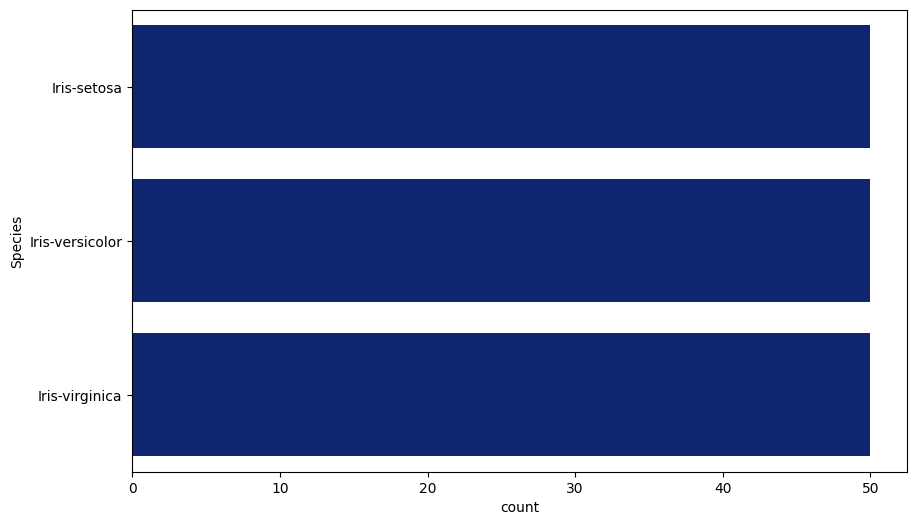

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(data.Species)

# **5. Visualisasi Data**

## **5.1. Pairplot untuk Melihat Hubungan antar Fitur**

Pairplot ini menunjukkan bagaimana fitur-fitur sepal dan petal saling berkorelasi serta distribusinya berdasarkan spesies.

* **sns.pairplot()**: Membuat matriks scatterplot untuk menampilkan hubungan antara setiap fitur (panjang dan lebar sepal serta petal). diag_kind='kde' membuat distribusi kernel density estimation (KDE) pada diagonal.
* **hue='Species'**: Membuat visualisasi berdasarkan kategori spesies.

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

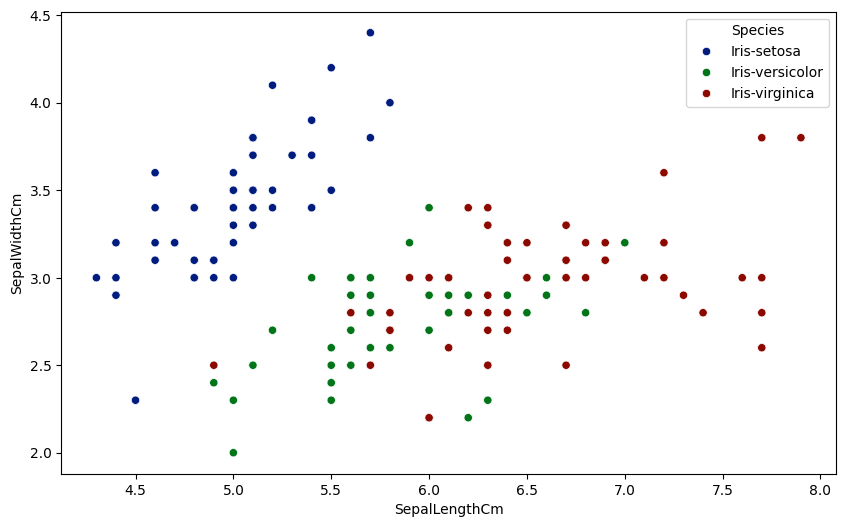

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=data)

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

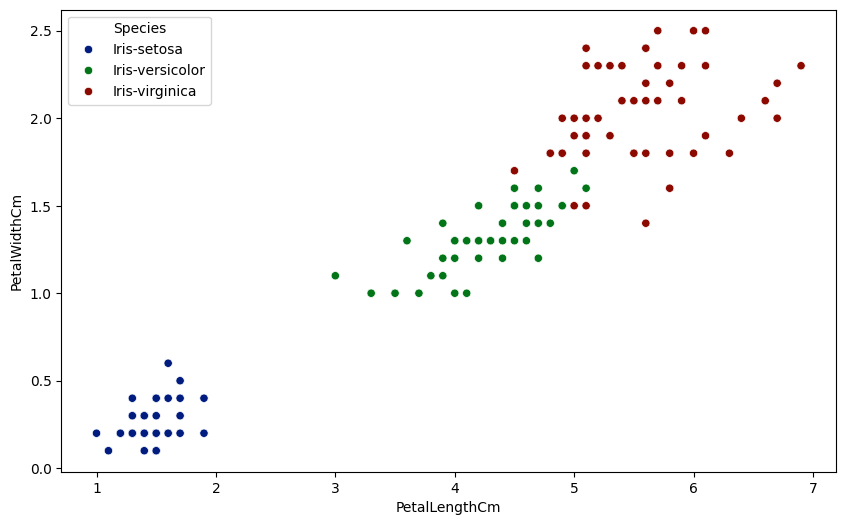

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=data)

## **5.2. Plot for Correlation**

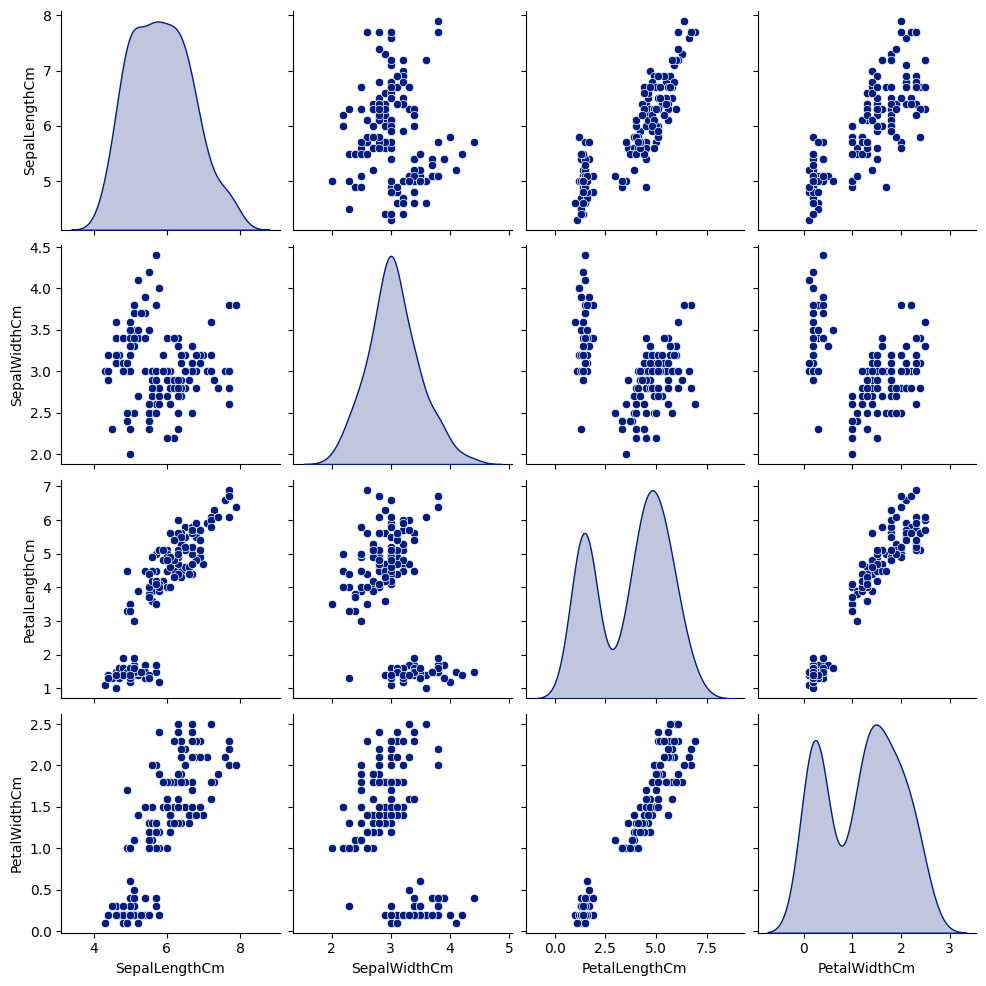

In [14]:
## pairplots to get an intuition of potential correlations
sns.pairplot(data[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "Species"]], diag_kind="kde")

## **5.3. Heatmap untuk Menampilkan Korelasi**

Heatmap ini menampilkan korelasi antar fitur. Nilai 1 berarti korelasi sempurna, sedangkan nilai mendekati 0 berarti tidak ada korelasi.

* **data.select_dtypes(include=['number'])**: Memilih kolom numerik dari dataset.
* **numeric_data.corr()**: Menghitung matriks korelasi antara fitur-fitur numerik.
* **sns.heatmap()**: Membuat heatmap untuk memvisualisasikan nilai korelasi antara fitur. annot=True menampilkan nilai korelasi di setiap sel.
* **cmap='RdYlGn'**: Menggunakan skema warna merah-kuning-hijau.



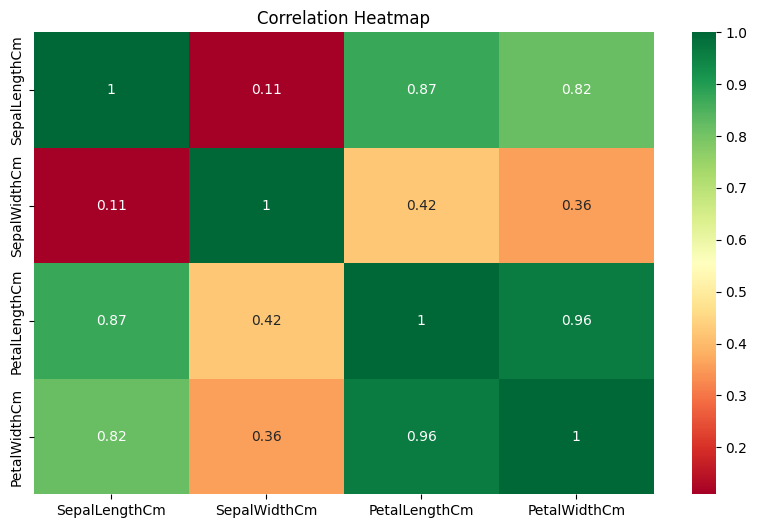

In [15]:
plt.figure(figsize=(10,6))
# Exclude the 'Species' column before calculating correlations
numeric_data = data.select_dtypes(include=['number'])
#draws  heatmap with input as the correlation matrix calculated by(data.corr())
sns.heatmap(numeric_data.corr().abs(), annot=True, cmap='RdYlGn')
plt.title('Correlation Heatmap')
plt.show()

## 5.4. **Clustered Heatmap**

  - `figsize=(10,6)`: Ukuran lebar dan tinggi figure dalam satuan inci. Dalam hal ini, lebar 10 inci dan tinggi 6 inci.

  - `select_dtypes(include=["number"])`: Fungsi ini memilih kolom-kolom dari dataframe yang berjenis numerik (misalnya, `int`, `float`).

```python
sns.clustermap(numeric_data.corr().abs(), cmap="plasma")
```
Membuat **clustered heatmap** menggunakan fungsi `clustermap` dari library `seaborn`.
  - `numeric_data.corr().abs()`: Kalkulasi **korelasi** antar kolom numerik yang ada di dataset, kemudian mengambil **nilai absolutnya**. Korelasi menunjukkan hubungan antara dua variabel, dengan nilai berkisar antara -1 hingga 1. Nilai absolut digunakan untuk melihat kekuatan hubungan tanpa memperhatikan apakah itu positif atau negatif.
  - `cmap="plasma"`: Digunakan untuk menentukan **warna** heatmap. Di sini, **colormap** yang digunakan adalah `"plasma"`, yang bervariasi dari ungu hingga kuning, untuk menunjukkan variasi kekuatan korelasi.

Text(0.5, 1.0, 'Cluster Heatmap')

<Figure size 1000x600 with 0 Axes>

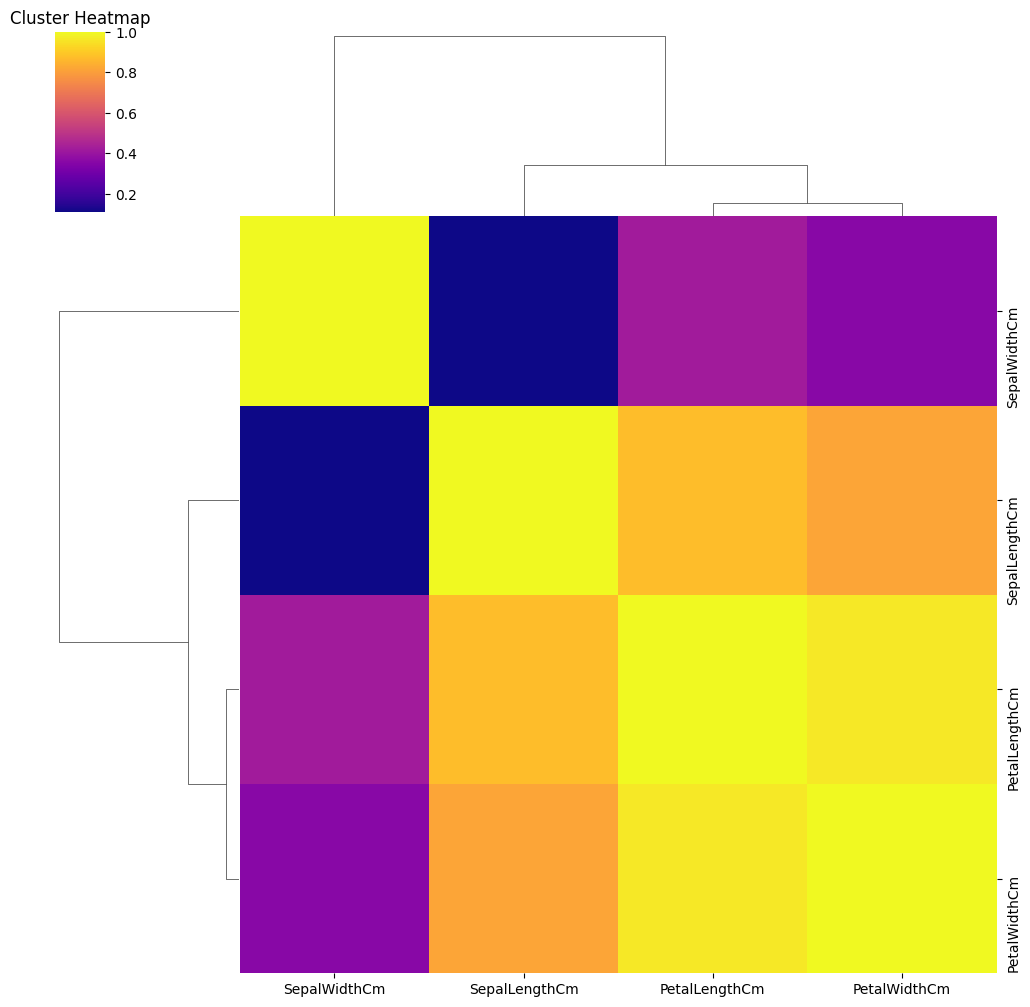

In [16]:
plt.figure(figsize=(10,6))
# Exclude the 'Species' column before calculating correlations
numeric_data = data.select_dtypes(include=['number'])
sns.clustermap(numeric_data.corr().abs(), cmap='plasma')
plt.title('Cluster Heatmap')

#**6. Split Data in Train and Test**

Ada banyak cara untuk membagi data menjadi set pelatihan dan pengujian, tetapi kita ingin set pengujian kita merepresentasikan keseluruhan populasi dan bukan hanya beberapa kategori tertentu. Oleh karena itu, alih-alih hanya menggunakan metode train_test_split() yang sederhana dan umum dari sklearn, kita juga akan menggunakan stratified sampling.

### Stratified Sampling
Kita membuat subkelompok yang homogen yang disebut strata dari keseluruhan populasi dan mengambil jumlah instansi yang tepat dari setiap stratum untuk memastikan bahwa set pengujian adalah representatif dari keseluruhan populasi.

Dari gambar kode yang kamu unggah, saya melihat bahwa ini adalah proses pembuatan model **K-Nearest Neighbor (KNN)** untuk klasifikasi menggunakan dataset **Iris**. Berikut adalah penjelasan detail per bagiannya:

## **6.1. Split Data Menggunakan StratifiedShuffleSplit**

- **Fungsi**: Membagi data menjadi **train** dan **test** dengan mempertahankan distribusi kelas (stratifikasi) berdasarkan kolom **Species**.
- **StratifiedShuffleSplit**: Membagi data dengan stratifikasi, sehingga distribusi kelas pada set **train** dan **test** tetap proporsional.
- **Parameter**:
  - `n_splits=1`: Hanya melakukan sekali pembagian.
  - `test_size=0.2`: 20% dari data digunakan untuk testing.
  - `random_state=42`: Untuk mengulang pembagian yang sama.


In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["Species"]):
    train_set_strat = data.loc[train_index]
    test_set_strat = data.loc[test_index]

## **6.2. Memeriksa Distribusi Data**

**Fungsi**: Menghitung distribusi kelas di **train set** dalam bentuk proporsi (rasio). Ini memastikan bahwa distribusi setiap kelas setara dengan distribusi aslinya di dataset.


In [18]:
##checking category distribution in training set
train_set_strat['Species'].value_counts() / len(train_set_strat)

,count
Species,
Iris-versicolor,0.333333
Iris-setosa,0.333333
Iris-virginica,0.333333


In [19]:
test_set_strat["Species"].value_counts() / len(test_set_strat)

,count
Species,
Iris-versicolor,0.333333
Iris-setosa,0.333333
Iris-virginica,0.333333


**Fungsi**: Sama seperti sebelumnya, tapi untuk **test set**.

## **6.3. Memisahkan Fitur dan Label**

**Fungsi**: Memisahkan **fitur (X)** dan **label (y)**.
  - `drop("Species", axis=1)`: Menghapus kolom **Species** dari set train/test karena ini adalah label, bukan fitur.
  - `train_set_strat_y`: Kolom **Species** diambil sebagai label.

In [20]:
train_set_strat_x = train_set_strat.copy().drop(['Species'], axis=1)
train_set_strat_y = train_set_strat['Species']

test_set_strat_x = test_set_strat.copy().drop(['Species'], axis=1)
test_set_strat_y = test_set_strat['Species']

In [21]:
train_set_strat_x.shape, train_set_strat_y.shape, test_set_strat_x.shape, test_set_strat_y.shape

((120, 4), (120,), (30, 4), (30,))

# 7. **Model K-Nearest Neighbor**

Membuat dan melatih model KNN dengan 3 tetangga terdekat.

**knn = KNeighborsClassifier(n_neighbors=3)**:
- **Fungsi**: Membuat sebuah objek **KNeighborsClassifier** dari **scikit-learn**. Model ini menggunakan algoritma K-Nearest Neighbors (KNN) untuk klasifikasi.
- **Parameter `n_neighbors=3`**: Menyatakan bahwa algoritma akan melihat 3 tetangga terdekat untuk menentukan kelas dari sebuah data baru.

Melatih model KNN menggunakan data training yang telah dibagi sebelumnya.
- `train_set_strat_X`: Data fitur (X) dari set training.
- `train_set_strat_y`: Data label (y) atau target dari set training, yaitu kolom **Species** yang berisi kategori klasifikasi.

**train_accuracy = knn.score(train_set_strat_X, train_set_strat_y)**:

Menghitung akurasi model pada **train set** dengan membandingkan prediksi dari model dengan label sebenarnya pada data training.
   - **`score()`**: Fungsi ini mengukur seberapa akurat prediksi model terhadap data training yang digunakan. Akurasi dihitung sebagai proporsi prediksi yang benar dari total prediksi.

### **Evaluasi Model di Training Set**
**print()**: Menampilkan akurasi model pada **training dataset**.

In [22]:
# Import the necessary class from the sklearn.neighbors module
from sklearn.neighbors import KNeighborsClassifier
# Import the metrics module
from sklearn import metrics # This line imports the metrics module

# k-nearest neighbor
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_set_strat_x, train_set_strat_y)
knn_Y_pred = knn.predict(test_set_strat_x)

# Assuming 'metrics' is already imported, if not, import it using:
# from sklearn import metrics
knn_accuracy = metrics.accuracy_score(test_set_strat_y, knn_Y_pred) * 100

print("Accuracy on training dataset : {:.2f}%".format(knn_accuracy) )

Accuracy on training dataset : 93.33%


In [23]:
# getting precision, recall and f1-score via classification report

print(metrics.classification_report(test_set_strat_y, knn_Y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



## **Evaluasi Model di Hyperparameter Tuning dengan GridSearchCV**

**Fungsi**: Melakukan tuning hyperparameter untuk mencari nilai **n_neighbors** terbaik menggunakan **GridSearchCV**.
- `param_grid = {'n_neighbors': np.arange(1, 31)}`: Mencari nilai terbaik untuk tetangga dalam rentang 1 hingga 31.
- `cv=10`: Menggunakan 10-fold cross-validation untuk mengevaluasi performa model.

In [24]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

knn = KNeighborsClassifier()

# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False, verbose=1)

# fitting the model for grid search
grid_search=grid.fit(train_set_strat_x, train_set_strat_y)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [25]:
print(grid_search.best_params_)

{'n_neighbors': 13}


In [26]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 96.67%


### Memeriksa Akurasi pada Data Pengujian

In [27]:
knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(train_set_strat_x, train_set_strat_y)

y_test_hat = knn.predict(test_set_strat_x)

test_accuracy=metrics.accuracy_score(test_set_strat_y, y_test_hat) * 100

print("Accuracy on testing dataset with tuning is : {:.2f}%".format(test_accuracy))

Accuracy on testing dataset with tuning is : 100.00%


In [28]:
# getting precision, recall and f1-score via classification report

print(metrics.classification_report(test_set_strat_y, y_test_hat))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



## **Confusion Matrix**

- **Fungsi**: Membuat dan menampilkan **confusion matrix**, yang menunjukkan bagaimana model mengklasifikasikan data dari tiap kelas.
  - **Confusion Matrix**: Matriks yang menunjukkan jumlah prediksi yang benar dan salah untuk setiap kelas.
  - `ConfusionMatrixDisplay`: Digunakan untuk memvisualisasikan confusion matrix dengan plot.

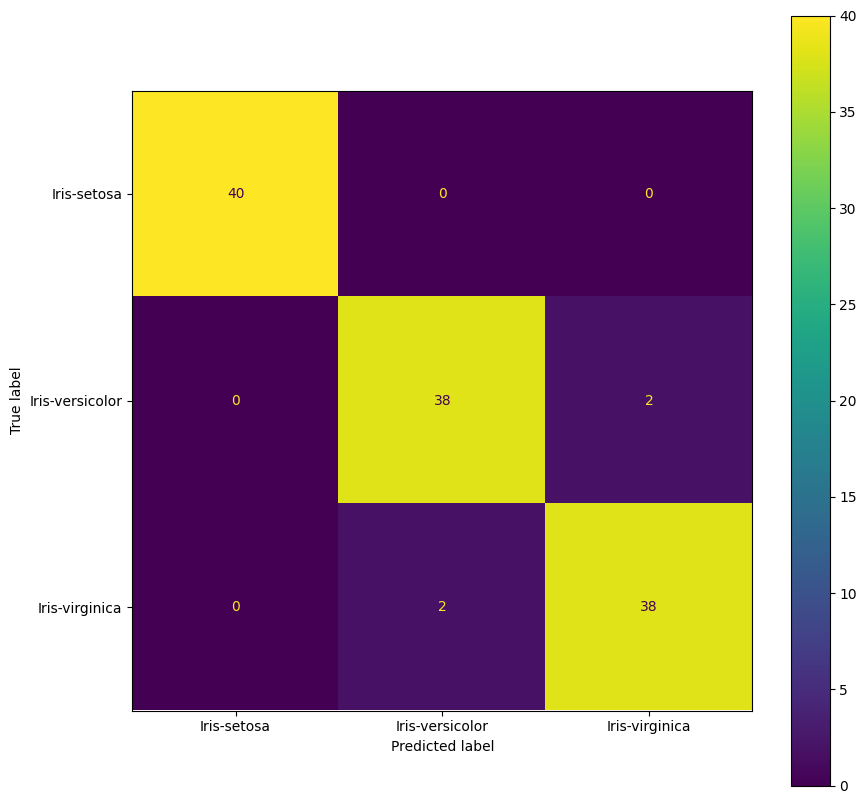

In [29]:
!pip install -U scikit-learn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Import ConfusionMatrixDisplay
import sklearn

fig, ax = plt.subplots(figsize=(10, 10))

# Replace plot_confusion_matrix with ConfusionMatrixDisplay
cm = confusion_matrix(train_set_strat_y, grid.predict(train_set_strat_x)) # Compute confusion matrix first
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.classes_) # Create display object
disp.plot(ax=ax, values_format='d') # Plot on the axes

plt.show()

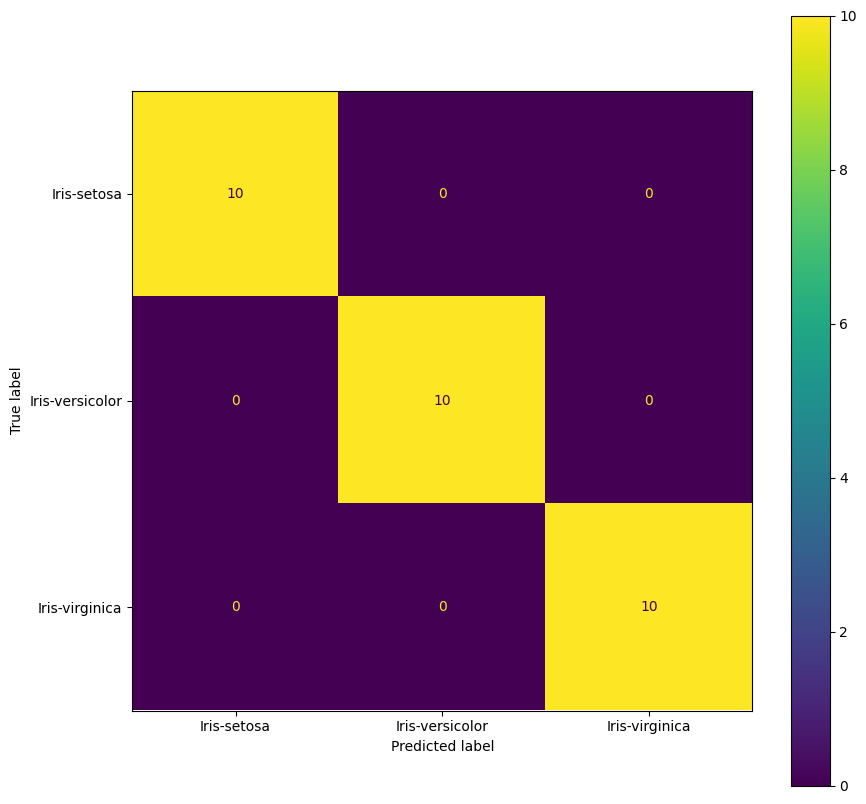

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Import ConfusionMatrixDisplay
import sklearn

fig, ax = plt.subplots(figsize=(10, 10))

# Replace plot_confusion_matrix with ConfusionMatrixDisplay
cm = confusion_matrix(test_set_strat_y, grid.predict(test_set_strat_x)) # Compute confusion matrix first
disp = ConfusionMatrixDisplay(confusion_matrix=cm, # Create display object
                              display_labels=grid.classes_)
disp.plot(ax=ax, values_format='d') # Plot on the axes

plt.show()